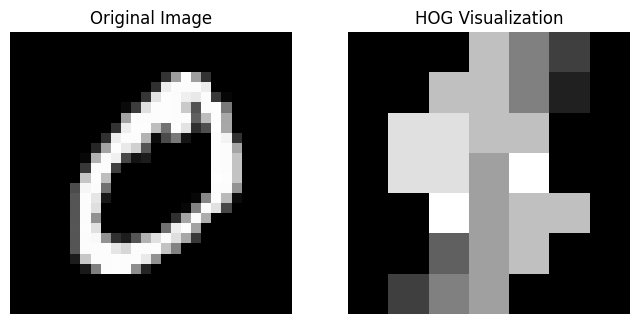

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Select an image
image = x_train[1].astype(np.float32)  # Convert to float for gradient calculations

# Step 1: Compute gradients using Sobel filter
Gx = np.zeros_like(image)  # Initialize gradient matrices
Gy = np.zeros_like(image)

# Sobel operators for gradient computation
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Apply Sobel filters (ignoring border pixels)
for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        Gx[i, j] = np.sum(sobel_x * image[i-1:i+2, j-1:j+2])
        Gy[i, j] = np.sum(sobel_y * image[i-1:i+2, j-1:j+2])

# Step 2: Compute gradient magnitude and orientation
magnitude = np.sqrt(Gx**2 + Gy**2)
orientation = np.arctan2(Gy, Gx) * (180 / np.pi)  # Convert to degrees

# Normalize orientations to be in range [0, 180]
orientation = np.mod(orientation, 180)

# Step 3: Compute HOG features (Dividing image into 4x4 cells and creating histograms)
cell_size = 4  # Define cell size
orient_bins = 9  # Number of orientation bins (0 to 180 degrees)
hog_image = np.zeros_like(image)  # To visualize HOG features

# Iterate through the image in non-overlapping 4x4 cells
for i in range(0, image.shape[0], cell_size):
    for j in range(0, image.shape[1], cell_size):
        cell_magnitudes = magnitude[i:i+cell_size, j:j+cell_size]
        cell_orientations = orientation[i:i+cell_size, j:j+cell_size]

        # Create histogram for this cell
        hist = np.zeros(orient_bins)
        for x in range(cell_size):
            for y in range(cell_size):
                bin_idx = int(cell_orientations[x, y] // (180 / orient_bins))  # Bin index
                hist[bin_idx] += cell_magnitudes[x, y]  # Weighted by magnitude

        # Store max orientation in hog_image for visualization
        max_orient = np.argmax(hist)
        hog_image[i:i+cell_size, j:j+cell_size] = (max_orient + 1) * (255 / orient_bins)

# Step 4: Normalize the HOG image (for better visualization)
hog_image = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min()) * 255

# Step 5: Plot the original and HOG images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.imshow(image, cmap='gray')
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(hog_image, cmap='gray')
ax2.set_title("HOG Visualization")
ax2.axis("off")

plt.show()
